# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [182]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [183]:
# Use this space for any additional import statements you need
from nltk.tokenize import word_tokenize
import statistics
#from sklearn.feature_extraction import text

In [184]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english") # given


# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()    # create a set 

def emoji_country(ls):
    for country in ls:   # relies on is_emoji results s so had to change to def than solid code 
        for em in country: 
            if emoji.is_emoji(em):
                all_language_emojis.add(em) # adds to the end of the set 


# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    num_tokens =  len(tokens)
    num_unique_tokens = len(set(tokens)) #len(np.unique(tokens))
    lexical_diversity =  len(set(tokens)) / len(tokens) # from the wikipedia article
    num_characters =  sum([len(i) for i in tokens]) 

    # Place your Module 2 solution here
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(Counter(tokens).most_common(5))
    
    return num_tokens,num_unique_tokens,lexical_diversity,num_characters


    
def contains_all_language_set(s):
    return(s in all_language_emojis)

def is_emoji(s):
    return(emoji.is_emoji(s))



def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if is_emoji(ch)]

    return(len(emojis) > 0)

wordsFiltered = [] # this line was missing
def remove_stop(tokens) :
    tokens = tokens.apply(lambda x: ' '.join([word for word in x.split() if word not in (sw)]))
    return tokens
    
    
def remove_punctuation(text) : 
    return text.str.replace('[^\w\s]','')

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """    
    #word = re.split('\s+', text)
    return  text.apply(word_tokenize)


def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

def lower(text):

    return(text.lower())

In [4]:
fruits = ["apple", "banana", "cherry"]

a_list = ["🤔,👭,👙"]
b=["🤔,🙈,a"]
c= ["✨"]
emoji_country(c)
print(all_language_emojis)

{'✨'}


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [185]:
# Feel fre to use the below cells as an example or read in the data in a way you prefer

data_location = "/Users/Blaven/ADS-509_Assignment/M1 Results" # change to your location if it is not in the same directory as your notebook
twitter_folder = "/twitter/"
lyrics_folder = "/Users/Blaven/ADS-509_Assignment/M1 Results/lyrics"

artist_files = {'cher':'cher_followers_data.txt',
                'robyn':'robynkonichiwa_followers_data.txt'}


In [186]:
twitter_data = pd.read_csv(data_location + twitter_folder + artist_files['cher'],
                           sep="\t",
                           quoting=3)
# read in tab seperated file
twitter_data['artist'] = "cher" # creates artists colm and store cher

In [187]:
twitter_data_2 = pd.read_csv(data_location + twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])
    
del(twitter_data_2)

In [188]:
twitter_data=twitter_data.fillna(" ")
twitter_data

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,,1302,1014,,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher
...,...,...,...,...,...,...,...,...
358367,jakegiles,Jake Giles,19725102,LA,7690,2165,"singer of songs, type 1 diabetic, tired $jakel...",robyn
358368,axelbluhme,Axel Bluhme,19573759,DK,238,1565,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,robyn
358369,RayRayRay27,Rachael :),19919217,Oldham,762,1479,A year to change a life is still a year ✨😌,robyn
358370,bhandberg,Ben Handberg,12642462,Sydney,432,593,Head of Consumer - Mango. Made in Melbourne. R...,robyn


In [189]:
# pulls lyrics and song titles and stores in series

def tester(artist):
    path = lyrics_folder+artist 
    list = []
    lyrics_storage = []
    # dirs=directories
    for (root, dirs, file) in os.walk(path):
        for f in file:
            if '.txt' in f:
                list.append(f)
                l_storage = open(path+"/"+f,'r')
                temp = l_storage.read()
                lyrics_storage.append(temp)
                l_storage.close()
            

    x = pd.Series(list)  
    y = pd.Series(lyrics_storage)

    return x,y

In [190]:
#tester("/robyn")
#("/cher")

x,y=tester("/robyn")
#display(x)
#display(y)

In [191]:


lyrics_data = pd.DataFrame()
lyrics_data['Lyrics'] = y
lyrics_data['Titles'] = x
lyrics_data['artist'] = "cher"
display(lyrics_data)

,Lyrics,Titles,artist
0,"""Include Me Out""\n\n\n\nIt is really very simp...",robyn_includemeout.txt,cher
1,"""Electric""\n\n\n\nElectric...\n\nIt's electric...",robyn_electric.txt,cher
2,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow...",robyn_beach2k20.txt,cher
3,"""Love Kills""\n\n\n\nIf you're looking for love...",robyn_lovekills.txt,cher
4,"""Time Machine""\n\n\n\nHey, what did I do?\nCan...",robyn_timemachine.txt,cher
...,...,...,...
99,"""Do You Really Want Me (Show Respect)""\n\n\n\n...",robyn_doyoureallywantmeshowrespect.txt,cher
100,"""The Last Time""\n\n\n\nEver since I was a litt...",robyn_thelasttime.txt,cher
101,"""Missing U""\n\n\n\nBaby, it's so weird to me n...",robyn_missingu.txt,cher
102,"""Breakdown Intermission""\n\n\n\nHey my friend ...",robyn_breakdownintermission.txt,cher


In [192]:
lyrics_data2 = pd.DataFrame()
lyrics_data2['Lyrics'] = y
lyrics_data2['Titles'] = x
lyrics_data2['artist'] = "robyn"

lyrics_data = pd.concat([
    lyrics_data,lyrics_data2])
del(lyrics_data2)
display(lyrics_data)

,Lyrics,Titles,artist
0,"""Include Me Out""\n\n\n\nIt is really very simp...",robyn_includemeout.txt,cher
1,"""Electric""\n\n\n\nElectric...\n\nIt's electric...",robyn_electric.txt,cher
2,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow...",robyn_beach2k20.txt,cher
3,"""Love Kills""\n\n\n\nIf you're looking for love...",robyn_lovekills.txt,cher
4,"""Time Machine""\n\n\n\nHey, what did I do?\nCan...",robyn_timemachine.txt,cher
...,...,...,...
99,"""Do You Really Want Me (Show Respect)""\n\n\n\n...",robyn_doyoureallywantmeshowrespect.txt,robyn
100,"""The Last Time""\n\n\n\nEver since I was a litt...",robyn_thelasttime.txt,robyn
101,"""Missing U""\n\n\n\nBaby, it's so weird to me n...",robyn_missingu.txt,robyn
102,"""Breakdown Intermission""\n\n\n\nHey my friend ...",robyn_breakdownintermission.txt,robyn


In [13]:
#lyrics_data['Lyrics'] = pd.Series(lyrics_data['Lyrics'], dtype="string")
#lyrics_data['Lyrics'].dtype
#tokenize(lyrics_data['Lyrics'])
#lyrics_data['Lyrics'].apply(word_tokenize)
#tokenize(lyrics_data['Lyrics'])
lyrics_data['Lyrics']=lyrics_data['Lyrics'].str.lower()
#lower(lyrics_data['Lyrics'])
#lyrics_data['Lyrics']
lyrics_data['Lyrics']

0      "come and stay with me"\n\n\n\ni'll send away ...
1      "pirate"\n\n\n\nhe'll sail on with the summer ...
2      "stars"\n\n\n\ni was never one for saying what...
3      "these days"\n\n\n\nwell i've been out walking...
4      "love so high"\n\n\n\nevery morning i would wa...
                             ...                        
99     "do you really want me (show respect)"\n\n\n\n...
100    "the last time"\n\n\n\never since i was a litt...
101    "missing u"\n\n\n\nbaby, it's so weird to me n...
102    "breakdown intermission"\n\n\n\nhey my friend ...
103    "play"\n\n\n\num'um'\nsome people live their l...
Name: Lyrics, Length: 420, dtype: object

In [193]:
#remove_punctuation(lyrics_data['Lyrics'])
#remove_stop(lyrics_data['Lyrics'])
lyrics_data["Lyrics"]=remove_punctuation(lyrics_data["Lyrics"])

lyrics_data["Lyrics"]


<ipython-input-184-f27191c6ef34>:68: FutureWarning: The default value of regex will change from True to False in a future version.
  return text.str.replace('[^\w\s]','')


0      Include Me Out\n\n\n\nIt is really very simple...
1      Electric\n\n\n\nElectric\n\nIts electric\nIts ...
2      Beach 2K20\n\n\n\nSo you wanna go out\nHow you...
3      Love Kills\n\n\n\nIf youre looking for love\nG...
4      Time Machine\n\n\n\nHey what did I do\nCant be...
                             ...                        
99     Do You Really Want Me Show Respect\n\n\n\nBoy ...
100    The Last Time\n\n\n\nEver since I was a little...
101    Missing U\n\n\n\nBaby its so weird to me now t...
102    Breakdown Intermission\n\n\n\nHey my friend I ...
103    Play\n\n\n\nUmUm\nSome people live their lives...
Name: Lyrics, Length: 208, dtype: object

In [194]:
lyrics_data["Lyrics"]= tokenize(lyrics_data["Lyrics"])


In [195]:
lyrics_data["Lyrics"]

0      [Include, Me, Out, It, is, really, very, simpl...
1      [Electric, Electric, Its, electric, Its, a, na...
2      [Beach, 2K20, So, you, wan, na, go, out, How, ...
3      [Love, Kills, If, youre, looking, for, love, G...
4      [Time, Machine, Hey, what, did, I, do, Cant, b...
                             ...                        
99     [Do, You, Really, Want, Me, Show, Respect, Boy...
100    [The, Last, Time, Ever, since, I, was, a, litt...
101    [Missing, U, Baby, its, so, weird, to, me, now...
102    [Breakdown, Intermission, Hey, my, friend, I, ...
103    [Play, UmUm, Some, people, live, their, lives,...
Name: Lyrics, Length: 208, dtype: object

In [196]:
lyrics_data

,Lyrics,Titles,artist
0,"[Include, Me, Out, It, is, really, very, simpl...",robyn_includemeout.txt,cher
1,"[Electric, Electric, Its, electric, Its, a, na...",robyn_electric.txt,cher
2,"[Beach, 2K20, So, you, wan, na, go, out, How, ...",robyn_beach2k20.txt,cher
3,"[Love, Kills, If, youre, looking, for, love, G...",robyn_lovekills.txt,cher
4,"[Time, Machine, Hey, what, did, I, do, Cant, b...",robyn_timemachine.txt,cher
...,...,...,...
99,"[Do, You, Really, Want, Me, Show, Respect, Boy...",robyn_doyoureallywantmeshowrespect.txt,robyn
100,"[The, Last, Time, Ever, since, I, was, a, litt...",robyn_thelasttime.txt,robyn
101,"[Missing, U, Baby, its, so, weird, to, me, now...",robyn_missingu.txt,robyn
102,"[Breakdown, Intermission, Hey, my, friend, I, ...",robyn_breakdownintermission.txt,robyn


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove punctuation
* Split on whitespace
* Remove stopwords (optional)

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove punctuation other than emojis or hashtags
* Split on whitespace
* Remove stopwords

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [197]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5


#lyrics_data["tokens"] = lyrics_data ["Lyrics"].apply(lower)
#lyrics_data["tokens"]= pd.Series(lyrics_data['Lyrics'], dtype="string")
#lyrics_data


#lyrics_data["tokens"]= lyrics_data["tokens"].apply(remove_punctuation)                        
#.apply(remove_punctuation)).apply(tokenize)
lyrics_data["num_tokens"] = lyrics_data["Lyrics"].map(len) 



In [198]:
lyrics_data

,Lyrics,Titles,artist,num_tokens
0,"[Include, Me, Out, It, is, really, very, simpl...",robyn_includemeout.txt,cher,454
1,"[Electric, Electric, Its, electric, Its, a, na...",robyn_electric.txt,cher,253
2,"[Beach, 2K20, So, you, wan, na, go, out, How, ...",robyn_beach2k20.txt,cher,301
3,"[Love, Kills, If, youre, looking, for, love, G...",robyn_lovekills.txt,cher,413
4,"[Time, Machine, Hey, what, did, I, do, Cant, b...",robyn_timemachine.txt,cher,230
...,...,...,...,...
99,"[Do, You, Really, Want, Me, Show, Respect, Boy...",robyn_doyoureallywantmeshowrespect.txt,robyn,225
100,"[The, Last, Time, Ever, since, I, was, a, litt...",robyn_thelasttime.txt,robyn,347
101,"[Missing, U, Baby, its, so, weird, to, me, now...",robyn_missingu.txt,robyn,372
102,"[Breakdown, Intermission, Hey, my, friend, I, ...",robyn_breakdownintermission.txt,robyn,139


In [199]:
#my_pipeline = [str.lower,second ,third ,fourth]
#twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["description"]=twitter_data["description"].str.lower()
twitter_data["description"]
#twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 

0                                                          
1                  𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2                 163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらdmします🧡
3                                                       csu
4         writer @washinformer @spelmancollege alumna #d...
                                ...                        
358367    singer of songs, type 1 diabetic, tired $jakel...
358368    dadx2/ con-arch/ photographer/ dk #stemgrønnes...
358369           a year to change a life is still a year ✨😌
358370    head of consumer - mango. made in melbourne. r...
358371    stand for what is right, even if you stand alone.
Name: description, Length: 4353175, dtype: object

In [21]:

twitter_data["description"]=remove_punctuation(twitter_data["description"])
twitter_data["description"]


<ipython-input-3-f27191c6ef34>:68: FutureWarning: The default value of regex will change from True to False in a future version.
  return text.str.replace('[^\w\s]','')


0                                                          
1                   𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜  𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2                       163愛かっぷ26歳 工〇好きな女の子 フォローしてくれたらdmします
3                                                       csu
4         writer washinformer spelmancollege alumna dcna...
                                ...                        
358367    singer of songs type 1 diabetic tired jakelgil...
358368    dadx2 conarch photographer dk stemgrønnest grø...
358369             a year to change a life is still a year 
358370    head of consumer  mango made in melbourne ramb...
358371      stand for what is right even if you stand alone
Name: description, Length: 4353175, dtype: object

In [200]:
twitter_data["description"]=remove_stop(twitter_data["description"])
twitter_data["description"]

0                                                          
1                  𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2                 163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらdmします🧡
3                                                       csu
4         writer @washinformer @spelmancollege alumna #d...
                                ...                        
358367    singer songs, type 1 diabetic, tired $jakelgil...
358368    dadx2/ con-arch/ photographer/ dk #stemgrønnes...
358369                       year change life still year ✨😌
358370    head consumer - mango. made melbourne. ramblin...
358371                       stand right, even stand alone.
Name: description, Length: 4353175, dtype: object

In [201]:
twitter_data["description"]=tokenize(twitter_data["description"])
twitter_data

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,,1302,1014,[],cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, &, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",cher
2,anju79990584,anju,1496463006451974150,,13,140,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",cher
3,gallionjenna,J,3366479914,,752,556,[csu],cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,"[writer, @, washinformer, @, spelmancollege, a...",cher
...,...,...,...,...,...,...,...,...
358367,jakegiles,Jake Giles,19725102,LA,7690,2165,"[singer, songs, ,, type, 1, diabetic, ,, tired...",robyn
358368,axelbluhme,Axel Bluhme,19573759,DK,238,1565,"[dadx2/, con-arch/, photographer/, dk, #, stem...",robyn
358369,RayRayRay27,Rachael :),19919217,Oldham,762,1479,"[year, change, life, still, year, ✨😌]",robyn
358370,bhandberg,Ben Handberg,12642462,Sydney,432,593,"[head, consumer, -, mango, ., made, melbourne,...",robyn


In [202]:

twitter_data["num_tokens"] = twitter_data["description"].map(len) 

In [24]:
twitter_data

,screen_name,name,id,location,followers_count,friends_count,description,artist,num_tokens
0,hsmcnp,Country Girl,35152213,,1302,1014,[],cher,0
1,horrormomy,Jeny,742153090850164742,Earth,81,514,"[𝙿𝚛𝚘𝚞𝚍, 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛, 𝚘𝚏, 𝚖𝚎𝚜𝚜𝚢, 𝚋𝚞𝚗𝚜, &, 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜]",cher,7
2,anju79990584,anju,1496463006451974150,,13,140,"[163㎝／愛かっぷ💜26歳🍒, 工〇好きな女の子💓, フォローしてくれたらdmします🧡]",cher,3
3,gallionjenna,J,3366479914,,752,556,[csu],cher,1
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,"[writer, @, washinformer, @, spelmancollege, a...",cher,27
...,...,...,...,...,...,...,...,...,...
358367,jakegiles,Jake Giles,19725102,LA,7690,2165,"[singer, songs, ,, type, 1, diabetic, ,, tired...",robyn,15
358368,axelbluhme,Axel Bluhme,19573759,DK,238,1565,"[dadx2/, con-arch/, photographer/, dk, #, stem...",robyn,12
358369,RayRayRay27,Rachael :),19919217,Oldham,762,1479,"[year, change, life, still, year, ✨😌]",robyn,6
358370,bhandberg,Ben Handberg,12642462,Sydney,432,593,"[head, consumer, -, mango, ., made, melbourne,...",robyn,11


In [26]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [27]:
twitter_data[twitter_data.has_emoji].sample(10)[["artist","description","num_tokens"]]

,artist,description,num_tokens
363371,cher,"[⚠️⚠️untamed, brat, territory, ., enter, risk,...",23
782376,cher,"[retired, nycd, captain, 👩‍✈️, ,, currently, n...",14
1071283,cher,"[medical, doctor, ⚛️🔬💉, music, addicted🎼🎵🎶🎤, t...",9
906735,cher,"[18, 🥖, venmo, :, anthonyarr0721]",5
1580173,cher,"[💖my, dog•family•beach•, photography•tennis, #...",25
1168244,cher,"[neznáš, neodcuzuj😉]",2
638827,cher,"[$, tangledworm2, 🤷🏽‍♀️]",3
922701,cher,"[east, londoner, french, twist, ., anglo, cath...",22
3754900,cher,"[great, things, always, begin, inside, ♥, trav...",19
991301,cher,[👤👣💲📞📰],1


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: Seems like some splits didnt occure during the tokenization  and some words are clumped together. Meaning that the token produced arent in good quality


## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [179]:
#df.loc[[2]] 
#descriptive_stats(lyrics_data["Lyrics"].loc[[2]] )  
# I guess its for all lyrics 
cher_lyrics=lyrics_data.loc[lyrics_data['artist'] == 'cher']
cher_lyrics= []
for i in robyn_lyrics["Lyrics"]:
    cher_song.extend(i)

    
descriptive_stats(cher_song)




There are 129463 tokens in the data.
There are 4785 unique tokens in the data.
There are 489723 characters in the data.
The lexical diversity is 0.037 in the data.
[('you', 5755), ('i', 4381), ('the', 4185), ('to', 3021), ('me', 2833)]


(129463, 4785, 0.03696036705467971, 489723)

In [180]:
robyn_lyrics=lyrics_data.loc[lyrics_data['artist'] == 'robyn']
robyn_song = []
for i in robyn_lyrics["Lyrics"]:
    robyn_song.extend(i)
descriptive_stats(robyn_song)

There are 29465 tokens in the data.
There are 2269 unique tokens in the data.
There are 112377 characters in the data.
The lexical diversity is 0.077 in the data.
[('you', 1487), ('the', 868), ('i', 848), ('me', 724), ('to', 667)]


(29465, 2269, 0.0770066180213813, 112377)

Q: what observations do you make about these data? 

A: Robyn lyrics for doyoureallywantme has more unique tokens that cher stars even though she has lower tokens. Also a common token was you.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [30]:
# your code here
#ndf=lyrics_data["Lyrics"]
#ndf.dtypes
#lyrics_data
#ndf=ndf.astype('string')
#new_df = ndf.str.split(expand=True).stack().value_counts().reset_index()
 
#new_df.columns = ['Word', 'Frequency'] 
 
#new_df


cher=lyrics_data.loc[lyrics_data['artist'] == 'cher']
cher_word_count=cher["Lyrics"]
cher_word_count=cher_word_count.astype('string')
cher_wordf = cher_word_count.str.split(expand=True).stack().value_counts().reset_index()
cher_wordf.columns  = ['Word', 'Frequency'] 
cher_wordf

,Word,Frequency
0,"'you',",2754
1,"'i',",2663
2,"'the',",2425
3,"'to',",1686
4,"'and',",1570
...,...,...
4194,"'fot',",1
4195,"'committed',",1
4196,"'often',",1
4197,"['strong',",1


In [31]:
robyn=lyrics_data.loc[lyrics_data['artist'] == 'robyn']
robyn_word_count=robyn["Lyrics"]
robyn_word_count=robyn_word_count.astype('string')
robyn_wordf = robyn_word_count.str.split(expand=True).stack().value_counts().reset_index()
robyn_wordf.columns  = ['Word', 'Frequency'] 
robyn_wordf

,Word,Frequency
0,"'you',",1485
1,"'the',",867
2,"'i',",847
3,"'me',",716
4,"'to',",666
...,...,...
2405,"'anybodyelses',",1
2406,"'flashing',",1
2407,"['here',",1
2408,"'eclipse',",1


In [32]:
robyn_desc=twitter_data.loc[twitter_data['artist'] == 'robyn']
robyn_word_desc_count=robyn_desc["description"]
robyn_word_desc_count=robyn_word_desc_count.astype('string')
copra3 = robyn_word_desc_count.str.split(expand=True).stack().value_counts().reset_index()
copra3.columns  = ['Word', 'Frequency'] 
copra3

,Word,Frequency
0,[],168578
1,"',',",136988
2,"'.',",98794
3,'.'],49873
4,"'@',",33896
...,...,...
295885,"['leverar',",1
295886,"'disparaged',",1
295887,"'tullbroskolan',",1
295888,"'❤️emina',",1


In [33]:
cher_desc=twitter_data.loc[twitter_data['artist'] == 'cher']
cher_worddesc_count=cher_desc["description"]
cher_worddesc_count=cher_worddesc_count.astype('string')
copra4 = cher_worddesc_count.str.split(expand=True).stack().value_counts().reset_index()
copra4.columns  = ['Word', 'Frequency'] 
copra4.head(20)

,Word,Frequency
0,[],1998344
1,"',',",1520729
2,"'.',",916508
3,'.'],402513
4,"'#',",399199
5,"'!',",354739
6,"':',",234102
7,"'@',",199007
8,"'&',",192757
9,"'love',",159684


In [34]:
df3 = copra4[copra4['Word'].isin(copra3['Word'])]

robyn_wordf
#display(df3)
df4=df3[df3['Word'].isin(robyn_wordf['Word'])]
#display(df4)
df5=df4[df4['Word'].isin(cher_wordf['Word'])]
df5=df5.drop(columns=['Frequency'])
display(df5) # filtered to common words in all 

,Word
9,"'love',"
12,"'life',"
14,"'i',"
18,"'music',"
20,"'de',"
...,...
97890,'fade']
101786,"'itll',"
104096,"'unfamiliar',"
113515,"['88',"


In [35]:
tempy=df5
Comb=pd.merge(tempy,copra4, how='inner', on=['Word'])
display(Comb)

,Word,Frequency
0,"'love',",159684
1,"'life',",105494
2,"'i',",94019
3,"'music',",77088
4,"'de',",72284
...,...,...
1320,'fade'],7
1321,"'itll',",7
1322,"'unfamiliar',",6
1323,"['88',",6


In [36]:
Comb2=pd.merge(Comb,copra3, how='inner', on=['Word'])
display(Comb2)

,Word,Frequency_x,Frequency_y
0,"'love',",159684,8702
1,"'life',",105494,6326
2,"'i',",94019,6614
3,"'music',",77088,12811
4,"'de',",72284,6311
...,...,...,...
1320,'fade'],7,1
1321,"'itll',",7,1
1322,"'unfamiliar',",6,1
1323,"['88',",6,1


In [37]:
Comb3=pd.merge(Comb2,robyn_wordf, how='inner', on=['Word'])
display(Comb3)

,Word,Frequency_x,Frequency_y,Frequency
0,"'love',",159684,8702,270
1,"'life',",105494,6326,39
2,"'i',",94019,6614,847
3,"'music',",77088,12811,31
4,"'de',",72284,6311,1
...,...,...,...,...
1320,'fade'],7,1,1
1321,"'itll',",7,1,13
1322,"'unfamiliar',",6,1,1
1323,"['88',",6,1,1


In [38]:
Comb4=pd.merge(Comb3,cher_wordf, how='inner', on=['Word'])
display(Comb4)

,Word,Frequency_x,Frequency_y,Frequency_x,Frequency_y
0,"'love',",159684,8702,270,982
1,"'life',",105494,6326,39,123
2,"'i',",94019,6614,847,2663
3,"'music',",77088,12811,31,33
4,"'de',",72284,6311,1,1
...,...,...,...,...,...
1320,'fade'],7,1,1,4
1321,"'itll',",7,1,13,7
1322,"'unfamiliar',",6,1,1,1
1323,"['88',",6,1,1,1


In [39]:
totalsum=Comb4
totalsum['totalsum'] = totalsum.sum(axis=1)
display(totalsum)

,Word,Frequency_x,Frequency_y,Frequency_x,Frequency_y,totalsum
0,"'love',",159684,8702,270,982,169638.0
1,"'life',",105494,6326,39,123,111982.0
2,"'i',",94019,6614,847,2663,104143.0
3,"'music',",77088,12811,31,33,89963.0
4,"'de',",72284,6311,1,1,78597.0
...,...,...,...,...,...,...
1320,'fade'],7,1,1,4,13.0
1321,"'itll',",7,1,13,7,28.0
1322,"'unfamiliar',",6,1,1,1,9.0
1323,"['88',",6,1,1,1,9.0


In [40]:
# top 10 common words 
top10=totalsum.sort_values(by='totalsum', ascending=False)
top10.columns.values[1] = 'cher_dec'
top10.columns.values[2] = 'robyn_dec'
top10.columns.values[3] = 'robyn_lyric'
top10.columns.values[4] = 'cher_lyric'
#display(top10)

In [41]:
divisionResults1 = top10['cher_dec'].div(top10['totalsum'])
divisionResults2 = top10['robyn_dec'].div(top10['totalsum'])
divisionResults3 = top10['robyn_lyric'].div(top10['totalsum'])
divisionResults4 = top10['cher_lyric'].div(top10['totalsum'])


In [42]:
top10['divisionResults1'] = divisionResults1
newtop10=top10.sort_values(by ='divisionResults1', ascending=False)
newtop10.head(10) #R for cher_dec
# you can repeat for the rest of division to plug in  Answer is on divisionResults1

,Word,cher_dec,robyn_dec,robyn_lyric,cher_lyric,totalsum,divisionResults1
19,"'mother',",29645,676,1,16,30338.0,0.977157
21,"'wife',",27530,662,3,5,28200.0,0.976241
107,"'sister',",8861,225,1,1,9088.0,0.975022
414,"'block',",2042,53,1,2,2098.0,0.973308
81,"'children',",11279,307,1,14,11601.0,0.972244
415,"'momma',",2039,48,1,12,2100.0,0.970952
392,"'grown',",2170,58,1,8,2237.0,0.970049
57,"'kids',",14468,431,1,16,14916.0,0.969965
872,"'prison',",448,11,1,3,463.0,0.967603
17,"'family',",31856,1096,4,2,32958.0,0.966564


In [43]:

top10['divisionResults2'] = divisionResults2
newtop10div2=top10.sort_values(by ='divisionResults2', ascending=False)
newtop10div2.head(10)  #R for robyn_dec Answer is on divisionResults2

,Word,cher_dec,robyn_dec,robyn_lyric,cher_lyric,totalsum,divisionResults1,divisionResults2
921,"'dig',",379,261,8,4,652.0,0.581288,0.400307
445,"'till',",1873,1274,6,55,3208.0,0.583853,0.397132
1115,"'tar',",170,110,2,1,283.0,0.600707,0.388693
820,"'glad',",530,305,2,10,847.0,0.625738,0.360094
723,"'til',",768,355,28,23,1174.0,0.654174,0.302385
1316,"'satellites',",10,5,2,1,18.0,0.555556,0.277778
1280,"'drift',",37,13,3,2,55.0,0.672727,0.236364
724,"'beats',",762,229,6,2,999.0,0.762763,0.229229
243,"'house',",4331,1087,3,16,5437.0,0.796579,0.199926
262,"'men',",3941,970,5,13,4929.0,0.799554,0.196794


In [44]:

top10['divisionResults3'] = divisionResults3
newtop10div3=top10.sort_values(by ='divisionResults3', ascending=False)
newtop10div3.head(10)  #R for robyn_lyric  Answer is on divisionResults3

,Word,cher_dec,robyn_dec,robyn_lyric,cher_lyric,totalsum,divisionResults1,divisionResults2,divisionResults3
1313,"'conceal',",11,2,14,2,29.0,0.37931,0.068966,0.482759
1321,"'itll',",7,1,13,7,28.0,0.25,0.035714,0.464286
1319,"'springtime',",7,2,4,2,15.0,0.466667,0.133333,0.266667
962,"'its',",337,25,257,367,986.0,0.341785,0.025355,0.260649
1068,"'should',",218,19,94,42,373.0,0.58445,0.050938,0.252011
1315,"'itd',",10,1,4,1,16.0,0.625,0.0625,0.25
1181,"'chorus',",112,6,56,52,226.0,0.495575,0.026549,0.247788
1257,"'than',",52,6,36,53,147.0,0.353741,0.040816,0.244898
902,"'killing',",397,28,136,1,562.0,0.706406,0.049822,0.241993
933,"'your',",368,29,333,675,1405.0,0.261922,0.020641,0.237011


In [45]:

top10['divisionResults4'] = divisionResults4
newtop10div4=top10.sort_values(by ='divisionResults4', ascending=False)
newtop10div4.head(10) #R for cher_lyric  Answer is on divisionResults4 and the words associated with it

,Word,cher_dec,robyn_dec,robyn_lyric,cher_lyric,totalsum,divisionResults1,divisionResults2,divisionResults3,divisionResults4
1317,'you'],9,1,2,21,33.0,0.272727,0.030303,0.060606,0.636364
1196,"'were',",100,9,51,179,339.0,0.294985,0.026549,0.150442,0.528024
1259,"'youve',",50,7,27,80,164.0,0.304878,0.042683,0.164634,0.487805
933,"'your',",368,29,333,675,1405.0,0.261922,0.020641,0.237011,0.480427
1087,"'youre',",198,17,169,333,717.0,0.276151,0.02371,0.235704,0.464435
1318,'now'],8,2,1,9,20.0,0.4,0.1,0.05,0.45
962,"'its',",337,25,257,367,986.0,0.341785,0.025355,0.260649,0.372211
1257,"'than',",52,6,36,53,147.0,0.353741,0.040816,0.244898,0.360544
1258,"'their',",52,10,6,38,106.0,0.490566,0.09434,0.056604,0.358491
1213,"'ooh',",87,7,13,59,166.0,0.524096,0.042169,0.078313,0.355422


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: Love showed up alot in many diffrent forms and the description had a heavy weight on total tokens

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [46]:
from matplotlib import pyplot as plt

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    
    
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

(-0.5, 399.5, 199.5, -0.5)

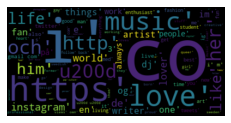

In [173]:
text=robyn_desc
text = text['description']
tempstorage=[]
for i in text.iteritems():
    tempstorage.extend(i)
tempstorage = ' '.join(str(e) for e in tempstorage)
text1=tempstorage
plt.figure(figsize=(4, 2)) ###
wc = WordCloud(max_words=100, stopwords=sw)
wc=wc.generate(text1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

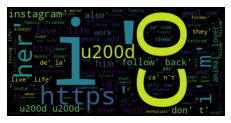

In [176]:

cher_desc=twitter_data.loc[twitter_data['artist'] == 'cher']
cher_desc = cher_desc['description']

tempstorage=[]
for i in cher_desc.iteritems():
    tempstorage.extend(i)
tempstorage = ' '.join(str(e) for e in tempstorage)
text1=tempstorage
plt.figure(figsize=(4, 2)) ###
wc = WordCloud(max_words=100, stopwords=sw)
wc=wc.generate(text1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [149]:
# drop first column 
#print(text1)


screen_name                                           ActuallyReal16
name                                                     Real Person
id                                               1502266279352315906
location                                                            
followers_count                                                    1
friends_count                                                    128
description        [hi, !, i, 'm, actual, ,, real, person, ., one...
artist                                                          cher
num_tokens                                                        11
has_emoji                                                      False
Name: 35, dtype: object

(-0.5, 399.5, 199.5, -0.5)

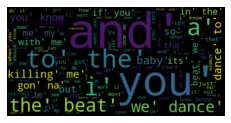

In [166]:
cher_lyrics=lyrics_data.loc[lyrics_data['artist'] == 'cher']
cher_lyrics['Lyrics']
tempstorage=[]
for i in robyn_lyrics['Lyrics'].iteritems():
    tempstorage.extend(i)
tempstorage = ' '.join(str(e) for e in tempstorage)
text1=tempstorage
plt.figure(figsize=(4, 2)) ###
wc = WordCloud(max_words=100, stopwords=sw)
wc=wc.generate(text1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

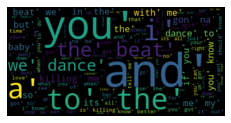

In [164]:
robyn_lyrics=lyrics_data.loc[lyrics_data['artist'] == 'robyn']
robyn_lyrics['Lyrics']
tempstorage=[]
for i in robyn_lyrics['Lyrics'].iteritems():
    tempstorage.extend(i)
tempstorage = ' '.join(str(e) for e in tempstorage)
text1=tempstorage
plt.figure(figsize=(4, 2)) ###
wc = WordCloud(max_words=100, stopwords=sw)
wc=wc.generate(text1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: Alot of words like you,I,Im which means my stopwords cleaning was skipped when running. followed with the conjunction of words. Also some web terminology like http and co which I think is com and follow. Alot if action words also faded in the background.